In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

In [2]:
mnist=tf.keras.datasets.fashion_mnist

(train_images,train_labels),(test_images,test_labels)=mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape,train_labels.shape,test_images.shape

((60000, 28, 28), (60000,), (10000, 28, 28))

In [4]:
print(test_labels)

[9 2 1 ... 8 1 5]


In [5]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

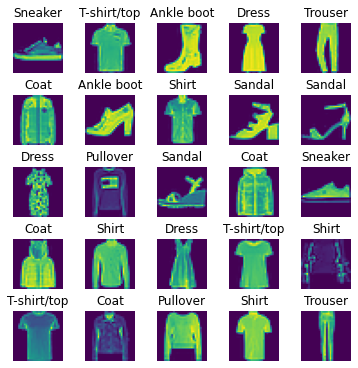

In [6]:
def rand_images(train_images, train_labels):
    select_images = random.sample(range(len(train_labels)),k=25)
    _, axes = plt.subplots(5, 5, figsize=(5,5), constrained_layout = True)
    for i in range(25):
        axes[i//5][i%5].imshow(train_images[select_images[i]])
        axes[i//5][i%5].axis('off')
        axes[i//5][i%5].set_title(class_name[train_labels[select_images[i]]])
rand_images(train_images,train_labels)

In [7]:

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

2022-03-15 09:07:29.473027: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-15 09:07:29.558022: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-15 09:07:29.558728: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-15 09:07:29.559820: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 128)       147584    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 128)         0

In [12]:
model.fit(train_images, train_labels, epochs=30, batch_size=512, shuffle=True, validation_split=0.1)

2022-03-15 09:07:32.370635: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-03-15 09:07:33.994400: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


106/106 [==============================] - 15s 68ms/step - loss: 1.3718 - accuracy: 0.4657 - val_loss: 0.8697 - val_accuracy: 0.7102
Epoch 2/30
106/106 [==============================] - 6s 56ms/step - loss: 0.7628 - accuracy: 0.7159 - val_loss: 0.7146 - val_accuracy: 0.7725
Epoch 3/30
106/106 [==============================] - 6s 56ms/step - loss: 0.6659 - accuracy: 0.7516 - val_loss: 0.6417 - val_accuracy: 0.7838
Epoch 4/30
106/106 [==============================] - 6s 56ms/step - loss: 0.6005 - accuracy: 0.7743 - val_loss: 0.5890 - val_accuracy: 0.8008
Epoch 5/30
106/106 [==============================] - 6s 58ms/step - loss: 0.5564 - accuracy: 0.7962 - val_loss: 0.5266 - val_accuracy: 0.8295
Epoch 6/30
106/106 [==============================] - 6s 56ms/step - loss: 0.5160 - accuracy: 0.8121 - val_loss: 0.4811 - val_accuracy: 0.8443
Epoch 7/30
106/106 [==============================] - 6s 57ms/step - loss: 0.4779 - accuracy: 0.8264 - val_loss: 0.4656 - val_accuracy: 0.8420
Epoch 8/3

In [13]:
def viz_pred(image):
    pred = model.predict(image.reshape((1,28,28,1)))
    label = np.argmax(pred)
    return label
submission = []
for i in range(test_images.shape[0]):
    submission.append([viz_pred(test_images[i])])
submission = np.array(submission)


In [14]:
from  sklearn.metrics import classification_report,f1_score,accuracy_score

print(classification_report(test_labels,submission))
print("f1 score :- ",f1_score(test_labels,submission,average='weighted'))
print("accuracy score:- ",accuracy_score(test_labels,submission))

              precision    recall  f1-score   support

           0       0.89      0.81      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.85      0.88      0.86      1000
           3       0.91      0.90      0.90      1000
           4       0.91      0.72      0.81      1000
           5       0.96      0.98      0.97      1000
           6       0.62      0.78      0.69      1000
           7       0.95      0.96      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000

f1 score :-  0.8947556451916533
accuracy score:-  0.8932
